
**Name:** Heavy Equipment Price Predictor

**Author:** Sharome Burton

**Date:** 07/17/2021

**Description:** Machine learning model used to predict the auction sale price of heavy equipment

## 1. Problem definition
> How well can we predict the future sale price of a piece of heavy equipment (eg. a bulldozer), given its characteristics and previous examples of how much similar machines have been sold for?

## 2. Data
The data for this project can be downloaded from the Kaggle Bluebook for Bulldozers competition: https://www.kaggle.com/c/bluebook-for-bulldozers/data

There are 3 main datasets:

   * `Train.csv` is the training set, which contains data through the end of 2011.
   * `Valid.csv` is the validation set, which contains data from January 1, 2012 - April 30, 2012 You make predictions on this set throughout the majority of the competition. Your score on this set is used to create the public leaderboard.
   * `Test.csv` is the test set, which won't be released until the last week of the competition. It contains data from May 1, 2012 - November 2012. Your score on the test set determines your final rank for the competition.
   
## 3. Evaluation 

The evaluation metric for this competition is the RMSLE (root mean squared log error) between the actual and predicted auction prices.

For more on the evaluation of this project check: https://www.kaggle.com/c/bluebook-for-bulldozers/overview/evaluation

## 4. Features

Kaggle provides a data dictionary detailing all of the features of the dataset. You can view this data dictionary on Google Sheets: https://docs.google.com/spreadsheets/d/18ly-bLR8sbDJLITkWG7ozKm8l3RyieQ2Fpgix-beSYI/edit?usp=sharing

In [1]:
# Import tools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

In [2]:
# Import training and validation sets
df = pd.read_csv("data/TrainAndValid.csv", low_memory=False)

### Exploring dataset
Let us get a broad understanding of the nature of the dataset we're dealing with...

In [3]:
df.describe()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter
count,4.126980e+05,412698.000000,4.126980e+05,412698.000000,412698.000000,392562.000000,412698.000000,1.475040e+05
mean,2.011161e+06,31215.181414,1.230061e+06,6947.201828,135.169361,6.585268,1899.049637,3.522988e+03
std,1.080068e+06,23141.743695,4.539533e+05,6280.824982,9.646749,17.158409,292.190243,2.716993e+04
min,1.139246e+06,4750.000000,0.000000e+00,28.000000,121.000000,0.000000,1000.000000,0.000000e+00
25%,1.421898e+06,14500.000000,1.088593e+06,3261.000000,132.000000,1.000000,1985.000000,0.000000e+00
50%,1.645852e+06,24000.000000,1.284397e+06,4605.000000,132.000000,2.000000,1995.000000,0.000000e+00
75%,2.261012e+06,40000.000000,1.478079e+06,8899.000000,136.000000,4.000000,2001.000000,3.209000e+03
max,6.333349e+06,142000.000000,2.486330e+06,37198.000000,173.000000,99.000000,2014.000000,2.483300e+06


In [4]:
# Overview of all features and labels
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   saledate                  412698 non-null  object 
 10  fiModelDesc               412698 non-null  object 
 11  fiBaseModel               412698 non-null  object 
 12  fiSecondaryDesc           271971 non-null  object 
 13  fiModelSeries             58667 non-null   o

In [5]:
# Finding number of missing values
df.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

In [6]:
# Names of columns
df.columns

Index(['SalesID', 'SalePrice', 'MachineID', 'ModelID', 'datasource',
       'auctioneerID', 'YearMade', 'MachineHoursCurrentMeter', 'UsageBand',
       'saledate', 'fiModelDesc', 'fiBaseModel', 'fiSecondaryDesc',
       'fiModelSeries', 'fiModelDescriptor', 'ProductSize',
       'fiProductClassDesc', 'state', 'ProductGroup', 'ProductGroupDesc',
       'Drive_System', 'Enclosure', 'Forks', 'Pad_Type', 'Ride_Control',
       'Stick', 'Transmission', 'Turbocharged', 'Blade_Extension',
       'Blade_Width', 'Enclosure_Type', 'Engine_Horsepower', 'Hydraulics',
       'Pushblock', 'Ripper', 'Scarifier', 'Tip_Control', 'Tire_Size',
       'Coupler', 'Coupler_System', 'Grouser_Tracks', 'Hydraulics_Flow',
       'Track_Type', 'Undercarriage_Pad_Width', 'Stick_Length', 'Thumb',
       'Pattern_Changer', 'Grouser_Type', 'Backhoe_Mounting', 'Blade_Type',
       'Travel_Controls', 'Differential_Type', 'Steering_Controls'],
      dtype='object')

In [7]:
df.saledate.head()

0    11/16/2006 0:00
1     3/26/2004 0:00
2     2/26/2004 0:00
3     5/19/2011 0:00
4     7/23/2009 0:00
Name: saledate, dtype: object

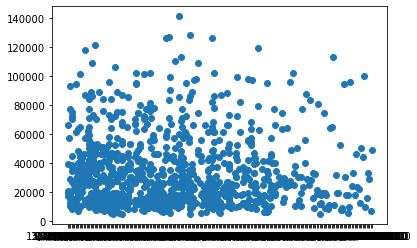

In [8]:
fig, ax = plt.subplots()
ax.scatter(df["saledate"][:1000], df["SalePrice"][:1000])

<AxesSubplot:ylabel='Frequency'>

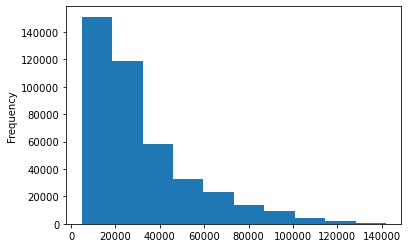

In [9]:
df.SalePrice.plot.hist()

### Parsing dates

When working with time series data, enriching the time & date component is helpful, using the `parse_dates` parameter.

In [10]:
# Import data again, but parse dates
df = pd.read_csv("data/TrainAndValid.csv",
                low_memory=False,
                parse_dates=["saledate"])
df.saledate.dtype

dtype('<M8[ns]')

In [11]:
df.saledate.head()

0   2006-11-16
1   2004-03-26
2   2004-02-26
3   2011-05-19
4   2009-07-23
Name: saledate, dtype: datetime64[ns]

Text(0, 0.5, 'Sale price ($)')

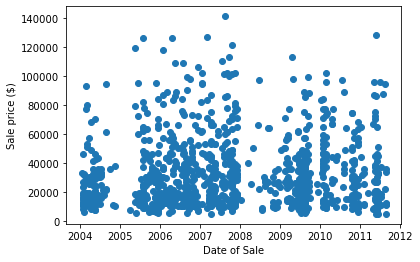

In [12]:
fig, ax = plt.subplots()
ax.scatter(df["saledate"][:1000], df["SalePrice"][:1000])
plt.xlabel("Date of Sale")
plt.ylabel("Sale price ($)")

Text(0, 0.5, 'Sale price ($)')

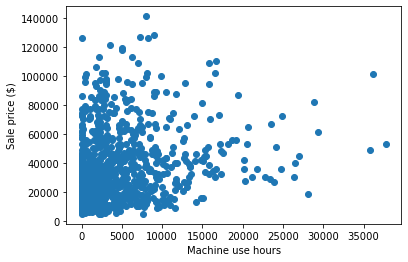

In [13]:
fig, ax = plt.subplots()
ax.scatter(df["MachineHoursCurrentMeter"][:1000], df["SalePrice"][:1000])
plt.xlabel("Machine use hours")
plt.ylabel("Sale price ($)")

In [14]:
df.head().T

,0,1,2,3,4
SalesID,1139246,1139248,1139249,1139251,1139253
SalePrice,66000.0,57000.0,10000.0,38500.0,11000.0
MachineID,999089,117657,434808,1026470,1057373
ModelID,3157,77,7009,332,17311
datasource,121,121,121,121,121
auctioneerID,3.0,3.0,3.0,3.0,3.0
YearMade,2004,1996,2001,2001,2007
MachineHoursCurrentMeter,68.0,4640.0,2838.0,3486.0,722.0
UsageBand,Low,Low,High,High,Medium
saledate,2006-11-16 00:00:00,2004-03-26 00:00:00,2004-02-26 00:00:00,2011-05-19 00:00:00,2009-07-23 00:00:00


In [15]:
df.saledate.head(20)

0    2006-11-16
1    2004-03-26
2    2004-02-26
3    2011-05-19
4    2009-07-23
5    2008-12-18
6    2004-08-26
7    2005-11-17
8    2009-08-27
9    2007-08-09
10   2008-08-21
11   2006-08-24
12   2005-10-20
13   2006-01-26
14   2006-01-03
15   2006-11-16
16   2007-06-14
17   2010-01-28
18   2006-03-09
19   2005-11-17
Name: saledate, dtype: datetime64[ns]

### Sort DataFrame by saledate

When working with time series data, it's a good idea to sort by date.

In [16]:
# Sort DataFrame in date order
df.sort_values(by=["saledate"], inplace=True, ascending=True)
df.saledate.head(20)

205615   1989-01-17
274835   1989-01-31
141296   1989-01-31
212552   1989-01-31
62755    1989-01-31
54653    1989-01-31
81383    1989-01-31
204924   1989-01-31
135376   1989-01-31
113390   1989-01-31
113394   1989-01-31
116419   1989-01-31
32138    1989-01-31
127610   1989-01-31
76171    1989-01-31
127000   1989-01-31
128130   1989-01-31
127626   1989-01-31
55455    1989-01-31
55454    1989-01-31
Name: saledate, dtype: datetime64[ns]

### Make a copy of the original DataFrame

We will make a copy of the original DataFrame so that when we manipulate the copy, we can revert to the original if necessary.


In [17]:
# Make a copy of original
df_tmp = df.copy()
df_tmp.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
205615,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,NaN,1989-01-17,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
274835,1821514,14000.0,1194089,10150,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
141296,1505138,50000.0,1473654,4139,132,99.0,1978,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
212552,1671174,16000.0,1327630,8591,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
62755,1329056,22000.0,1336053,4089,132,99.0,1984,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,Lever,NaN,NaN


### Add datetime parameters for `saledate` column

In [18]:
# Add new columns based on day of sale
df_tmp["saleYear"] = df_tmp.saledate.dt.year
df_tmp["saleMonth"] = df_tmp.saledate.dt.month
df_tmp["saleDay"] = df_tmp.saledate.dt.day
df_tmp["saleDayOfWeek"] = df_tmp.saledate.dt.dayofweek
df_tmp["saleDayOfYear"] = df_tmp.saledate.dt.dayofyear
df_tmp["weekday"] = df_tmp.saledate.dt.weekday
df_tmp["quarter"] = df_tmp.saledate.dt.quarter


In [19]:
df_tmp.T.head(10)

,205615,274835,141296,212552,62755,54653,81383,204924,135376,113390,...,409202,408976,411695,411319,408889,410879,412476,411927,407124,409203
SalesID,1646770,1821514,1505138,1671174,1329056,1301884,1379228,1645390,1493279,1449549,...,6283634,6282337,6311321,6306476,6281219,6302984,6324811,6313029,6266251,6283635
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0,23500.0,31000.0,11750.0,63000.0,13000.0,...,35000.0,7500.0,13000.0,53000.0,39000.0,16000.0,6000.0,16000.0,55000.0,34000.0
MachineID,1126363,1194089,1473654,1327630,1336053,1182999,1082797,1527216,1363756,1289412,...,1930870,1928688,1823846,1278794,1792049,1915521,1919104,1918416,509560,1869284
ModelID,8434,10150,4139,8591,4089,4123,7620,8202,2759,3356,...,4701,22072,17311,9114,13976,5266,19330,17244,3357,4701
datasource,132,132,132,132,132,132,132,132,132,132,...,149,149,149,149,149,149,149,149,149,149
auctioneerID,18.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,...,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0
YearMade,1974,1980,1978,1980,1984,1976,1986,1970,1987,1966,...,1998,2005,2005,2004,2000,2001,2004,2004,1993,1000
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
saledate,1989-01-17 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,...,2012-04-28 00:00:00,2012-04-28 00:00:00,2012-04-28 00:00:00,2012-04-28 00:00:00,2012-04-28 00:00:00,2012-04-28 00:00:00,2012-04-28 00:00:00,2012-04-28 00:00:00,2012-04-28 00:00:00,2012-04-28 00:00:00


In [20]:
# Now that we've enriched our DataFrame with date time features, we can remove it from dataset
df_tmp.drop("saledate", axis=1,inplace=True)

In [21]:
# Exploring data for different features

# State of sale
df_tmp.state.value_counts()

Florida           67320
Texas             53110
California        29761
Washington        16222
Georgia           14633
Maryland          13322
Mississippi       13240
Ohio              12369
Illinois          11540
Colorado          11529
New Jersey        11156
North Carolina    10636
Tennessee         10298
Alabama           10292
Pennsylvania      10234
South Carolina     9951
Arizona            9364
New York           8639
Connecticut        8276
Minnesota          7885
Missouri           7178
Nevada             6932
Louisiana          6627
Kentucky           5351
Maine              5096
Indiana            4124
Arkansas           3933
New Mexico         3631
Utah               3046
Unspecified        2801
Wisconsin          2745
New Hampshire      2738
Virginia           2353
Idaho              2025
Oregon             1911
Michigan           1831
Wyoming            1672
Iowa               1336
Montana            1336
Oklahoma           1326
Nebraska            866
West Virginia   

In [22]:
# Size of machine
df_tmp.ProductSize.value_counts()

Medium            64342
Large / Medium    51297
Small             27057
Mini              25721
Large             21396
Compact            6280
Name: ProductSize, dtype: int64

In [23]:
# Day of the week (Monday=0. Sunday=6)
df_tmp.weekday.value_counts()

3    124218
2     92137
1     77175
5     44517
4     44133
0     24275
6      6243
Name: weekday, dtype: int64

### Cleaning data - converting strings into categories

One way we can turn all of our data into number is by converting them to pandas categories.

In [24]:
pd.api.types.is_string_dtype(df_tmp["UsageBand"])

True

In [25]:
# Find columns that contain strings and replace them with categories
for label, content in df_tmp.items():
    if pd.api.types.is_string_dtype(content):
        print(f'column {label} converted to category')
        df_tmp[label] = content.astype("category").cat.as_ordered()

column UsageBand converted to category
column fiModelDesc converted to category
column fiBaseModel converted to category
column fiSecondaryDesc converted to category
column fiModelSeries converted to category
column fiModelDescriptor converted to category
column ProductSize converted to category
column fiProductClassDesc converted to category
column state converted to category
column ProductGroup converted to category
column ProductGroupDesc converted to category
column Drive_System converted to category
column Enclosure converted to category
column Forks converted to category
column Pad_Type converted to category
column Ride_Control converted to category
column Stick converted to category
column Transmission converted to category
column Turbocharged converted to category
column Blade_Extension converted to category
column Blade_Width converted to category
column Enclosure_Type converted to category
column Engine_Horsepower converted to category
column Hydraulics converted to category


In [26]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412698 entries, 205615 to 409203
Data columns (total 59 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   SalesID                   412698 non-null  int64   
 1   SalePrice                 412698 non-null  float64 
 2   MachineID                 412698 non-null  int64   
 3   ModelID                   412698 non-null  int64   
 4   datasource                412698 non-null  int64   
 5   auctioneerID              392562 non-null  float64 
 6   YearMade                  412698 non-null  int64   
 7   MachineHoursCurrentMeter  147504 non-null  float64 
 8   UsageBand                 73670 non-null   category
 9   fiModelDesc               412698 non-null  category
 10  fiBaseModel               412698 non-null  category
 11  fiSecondaryDesc           271971 non-null  category
 12  fiModelSeries             58667 non-null   category
 13  fiModelDescriptor       

In [27]:
df_tmp.ProductSize.cat.categories

Index(['Compact', 'Large', 'Large / Medium', 'Medium', 'Mini', 'Small'], dtype='object')

In [28]:
# Check missing data
print(f'Missing data percentage:\n{(df_tmp.isna().sum())/(len(df_tmp))*100.0}')

Missing data percentage:
SalesID                      0.000000
SalePrice                    0.000000
MachineID                    0.000000
ModelID                      0.000000
datasource                   0.000000
auctioneerID                 4.879113
YearMade                     0.000000
MachineHoursCurrentMeter    64.258610
UsageBand                   82.149174
fiModelDesc                  0.000000
fiBaseModel                  0.000000
fiSecondaryDesc             34.099269
fiModelSeries               85.784520
fiModelDescriptor           81.871490
ProductSize                 52.485110
fiProductClassDesc           0.000000
state                        0.000000
ProductGroup                 0.000000
ProductGroupDesc             0.000000
Drive_System                74.051970
Enclosure                    0.080931
Forks                       52.092087
Pad_Type                    80.349796
Ride_Control                62.992794
Stick                       80.349796
Transmission             

### Save preprocessed data

In [29]:
# Export current tmp dataframe
df_tmp.to_csv("data/train_tmp.csv", index=False)

In [30]:
# Import preprocessed data
df_tmp = pd.read_csv("data/train_tmp.csv", low_memory=False)

# df_tmp.head().T

### Fill missing values

#### Numeric values

In [31]:
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        print(f'column {label} is numeric')

column SalesID is numeric
column SalePrice is numeric
column MachineID is numeric
column ModelID is numeric
column datasource is numeric
column auctioneerID is numeric
column YearMade is numeric
column MachineHoursCurrentMeter is numeric
column saleYear is numeric
column saleMonth is numeric
column saleDay is numeric
column saleDayOfWeek is numeric
column saleDayOfYear is numeric
column weekday is numeric
column quarter is numeric


In [32]:
# Check for which numeric columns have null values and fill them
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            # Add a binary column which tells us if data was missing 
            df_tmp[label+"_is_missing"] = pd.isnull(content)
            # Fill missing numeric values with median
            df_tmp[label] = content.fillna(content.median())
            print(f'column {label} had null values, columns were filled with median')

column auctioneerID had null values, columns were filled with median
column MachineHoursCurrentMeter had null values, columns were filled with median


In [33]:
# Check for missing values
df_tmp.isna().sum()[:50]

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                     0
YearMade                         0
MachineHoursCurrentMeter         0
UsageBand                   339028
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension             386715
Blade_Width         

In [34]:
# Check how many samples of auctioneerID with missing values there were
df_tmp.auctioneerID_is_missing.value_counts()

False    392562
True      20136
Name: auctioneerID_is_missing, dtype: int64

In [35]:
df_tmp.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Steering_Controls,saleYear,saleMonth,saleDay,saleDayOfWeek,saleDayOfYear,weekday,quarter,auctioneerID_is_missing,MachineHoursCurrentMeter_is_missing
0,1646770,9500.0,1126363,8434,132,18.0,1974,0.0,NaN,TD20,...,NaN,1989,1,17,1,17,1,1,False,True
1,1821514,14000.0,1194089,10150,132,99.0,1980,0.0,NaN,A66,...,Conventional,1989,1,31,1,31,1,1,False,True
2,1505138,50000.0,1473654,4139,132,99.0,1978,0.0,NaN,D7G,...,NaN,1989,1,31,1,31,1,1,False,True
3,1671174,16000.0,1327630,8591,132,99.0,1980,0.0,NaN,A62,...,Conventional,1989,1,31,1,31,1,1,False,True
4,1329056,22000.0,1336053,4089,132,99.0,1984,0.0,NaN,D3B,...,NaN,1989,1,31,1,31,1,1,False,True


#### Filling and turning categories to number

In [36]:
# Check for columns that are not numeric
for label, content in df_tmp.items():
    if not pd.api.types.is_numeric_dtype(content):
        print(label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [173]:
# Turn categorical variables into numbers and fill missing
for label, content in df_tmp.items():
    if not pd.api.types.is_numeric_dtype(content):
        # Add binary column to indicate whether sample had missing value
        df_tmp[label+"_is_missing"] = pd.isnull(content)
        # Turn categories into numbers and add +1
        df_tmp[label] = pd.Categorical(content).codes + 1

In [174]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Columns: 105 entries, SalesID to Steering_Controlsis_missing
dtypes: bool(46), float64(3), int16(4), int64(12), int8(40)
memory usage: 84.2 MB


In [175]:
# Check for missing values
df_tmp.isna().sum()[:50]

SalesID                     0
SalePrice                   0
MachineID                   0
ModelID                     0
datasource                  0
auctioneerID                0
YearMade                    0
MachineHoursCurrentMeter    0
UsageBand                   0
fiModelDesc                 0
fiBaseModel                 0
fiSecondaryDesc             0
fiModelSeries               0
fiModelDescriptor           0
ProductSize                 0
fiProductClassDesc          0
state                       0
ProductGroup                0
ProductGroupDesc            0
Drive_System                0
Enclosure                   0
Forks                       0
Pad_Type                    0
Ride_Control                0
Stick                       0
Transmission                0
Turbocharged                0
Blade_Extension             0
Blade_Width                 0
Enclosure_Type              0
Engine_Horsepower           0
Hydraulics                  0
Pushblock                   0
Ripper    

Now that all our data is numeric and has no missing values, we should be able to build a model

## 5. Modelling

We will now do some model-driven EDA and build a machine learning model

In [176]:
%%time 
# Checking time taken to execute cell


# First using Random Forest Regressor model
from sklearn.ensemble import RandomForestRegressor

# Instantiate model

model = RandomForestRegressor(n_jobs=-1,
                              random_state=18,
                             max_samples=1000)

model.fit(df_tmp.drop("SalePrice", axis=1), df_tmp["SalePrice"])

Wall time: 2.33 s


RandomForestRegressor(max_samples=1000, n_jobs=-1, random_state=18)

In [177]:
# Score model
model.score(df_tmp.drop("SalePrice", axis=1), df_tmp["SalePrice"])

0.7564409930415475

Above methodology is a bad practice, test and validation sets must be kept separate

In [178]:
df_tmp.saleYear.value_counts()

2009    43849
2008    39767
2011    35197
2010    33390
2007    32208
2006    21685
2005    20463
2004    19879
2001    17594
2000    17415
2002    17246
2003    15254
1998    13046
1999    12793
2012    11573
1997     9785
1996     8829
1995     8530
1994     7929
1993     6303
1992     5519
1991     5109
1989     4806
1990     4529
Name: saleYear, dtype: int64

In [179]:
# Split data into training and validation sets
df_val = df_tmp[df_tmp.saleYear == 2012]
df_train = df_tmp[df_tmp.saleYear != 2012]
            
len(df_val), len(df_train)

(11573, 401125)

In [180]:
# Split data into X and y
X_train, y_train = df_train.drop("SalePrice", axis=1), df_train.SalePrice
X_valid, y_valid = df_val.drop("SalePrice", axis=1), df_val.SalePrice

X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

((401125, 104), (401125,), (11573, 104), (11573,))

In [181]:
X_train.columns

Index(['SalesID', 'MachineID', 'ModelID', 'datasource', 'auctioneerID',
       'YearMade', 'MachineHoursCurrentMeter', 'UsageBand', 'fiModelDesc',
       'fiBaseModel',
       ...
       'Undercarriage_Pad_Widthis_missing', 'Stick_Lengthis_missing',
       'Thumbis_missing', 'Pattern_Changeris_missing',
       'Grouser_Typeis_missing', 'Backhoe_Mountingis_missing',
       'Blade_Typeis_missing', 'Travel_Controlsis_missing',
       'Differential_Typeis_missing', 'Steering_Controlsis_missing'],
      dtype='object', length=104)

### Building an evaluation function for model

In [182]:
# Create evaluation function for competition metric
from sklearn.metrics import mean_squared_log_error, mean_absolute_error, r2_score

def rmsle(y_test, y_pred):
    """
    Calculates root mean squared log error between predictions
    and true labels
    """
    return np.sqrt(mean_squared_log_error(y_test, y_pred))

# Create function to evaluate model on a various other metrics
def show_scores(model):
    train_pred = model.predict(X_train)
    val_pred = model.predict(X_valid)
    scores = {"Training MAE": mean_absolute_error(y_train, train_pred),
             "Valid MAE": mean_absolute_error(y_valid, val_pred),
             "Training RMSLE": rmsle(y_train, train_pred),
             "Valid RMSLE": rmsle(y_valid, val_pred),
             "Training R^2": r2_score(y_train, train_pred),
             "Valid R^2": r2_score(y_valid, val_pred)}
    return scores

### Testing our model on a subset (tuning hyperparameters)

In [183]:
# # This is far too time-consuming for experimentation

# %%time
# model = RandomForestRegressor(n_jobs=-1,
#                              random_state=18)

# model.fit(X_train, y_train)

In [184]:
# Change max_samples value
model = RandomForestRegressor(n_jobs=-1,
                             random_state=18,
                             max_samples=0.02) # Use 2% of dataset

In [185]:
%%time
# Cutting down on max number of samples improves time efficiency
model.fit(X_train, y_train)

Wall time: 4.63 s


RandomForestRegressor(max_samples=0.02, n_jobs=-1, random_state=18)

In [186]:
%%time
show_scores(model)

Wall time: 2.39 s


{'Training MAE': 5717.573754066689,
 'Valid MAE': 7339.593289553271,
 'Training RMSLE': 0.26411782883262636,
 'Valid RMSLE': 0.30211160474529486,
 'Training R^2': 0.8535500662019335,
 'Valid R^2': 0.8256892753377085}

### Hyperparameter tuning with `RandomizedSearchCV`

In [187]:
%%time
from sklearn.model_selection import RandomizedSearchCV

# Different RandomForestRegressor hyperparameters
rf_grid = {"n_estimators": np.arange(10,100,10),
          "max_depth": [None, 3,5,10],
          "min_samples_split": np.arange(2,20,2),
          "min_samples_leaf": np.arange(1,20,2),
          "max_features": [0.5, 1, "sqrt", "auto"],
          "max_samples": [10000]}

# Instantiate RandomizedSearchCV model
rs_model = RandomizedSearchCV(RandomForestRegressor(n_jobs=-1,
                                                   random_state=18),
                                                   param_distributions=rf_grid,
                                                   n_iter=2,
                                                   cv=5,
                                                   verbose=True)
# Fit RandomizedSearchCV model
rs_model.fit(X_train, y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
Wall time: 30.7 s


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=18),
                   n_iter=2,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'max_samples': [10000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [188]:
# Find best model hyperparameters
rs_model.best_params_

{'n_estimators': 60,
 'min_samples_split': 14,
 'min_samples_leaf': 3,
 'max_samples': 10000,
 'max_features': 0.5,
 'max_depth': 3}

In [189]:
# Evaluate RandomizedSearch model
show_scores(rs_model)

{'Training MAE': 11913.828536992141,
 'Valid MAE': 13458.64372261624,
 'Training RMSLE': 0.5124702578840451,
 'Valid RMSLE': 0.5115517856995121,
 'Training R^2': 0.48176580568203686,
 'Valid R^2': 0.48901093582955946}

### Train a model with the best hyperparameters

**Note:** These hyperparameters were found after 100 iterations of `RandomizedSearchCV`

In [190]:
%%time

ideal_model = RandomForestRegressor(n_estimators=40,
                                   min_samples_leaf=1,
                                   min_samples_split=14,
                                   max_features=0.5,
                                   n_jobs=-1,
                                   max_samples=None,
                                   random_state=18,
                                   verbose=True)

# Fit ideal model
ideal_model.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.


Wall time: 26.8 s


[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:   25.1s finished


RandomForestRegressor(max_features=0.5, min_samples_split=14, n_estimators=40,
                      n_jobs=-1, random_state=18, verbose=True)

In [191]:
# Scores for ideal model (trained on all data)
show_scores(ideal_model)

[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  40 out of  40 | elapsed:    0.5s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  40 out of  40 | elapsed:    0.0s finished


{'Training MAE': 2949.375380012694,
 'Valid MAE': 5961.459885074376,
 'Training RMSLE': 0.14441000463093825,
 'Valid RMSLE': 0.24626589650052932,
 'Training R^2': 0.9590206098929114,
 'Valid R^2': 0.8814556429173559}

Model has validation root mean squared log value of **0.24626589650052932**

In [192]:
# Scores for rs_model (trained on 10,000 samples)
show_scores(rs_model)

{'Training MAE': 11913.828536992141,
 'Valid MAE': 13458.64372261624,
 'Training RMSLE': 0.5124702578840451,
 'Valid RMSLE': 0.5115517856995121,
 'Training R^2': 0.48176580568203686,
 'Valid R^2': 0.48901093582955957}

### Making Predictions on test data

In [193]:
# Import test data
df_test = pd.read_csv("data/Test.csv",
                     low_memory=False,
                     parse_dates=["saledate"])
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1227829,1006309,3168,121,3,1999,3688.0,Low,2012-05-03,580G,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1227844,1022817,7271,121,3,1000,28555.0,High,2012-05-10,936,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1227847,1031560,22805,121,3,2004,6038.0,Medium,2012-05-10,EC210BLC,...,None or Unspecified,"9' 6""",Manual,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
3,1227848,56204,1269,121,3,2006,8940.0,High,2012-05-10,330CL,...,None or Unspecified,None or Unspecified,Manual,Yes,Triple,NaN,NaN,NaN,NaN,NaN
4,1227863,1053887,22312,121,3,2005,2286.0,Low,2012-05-10,650K,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN


### Will not work...

In [194]:
# # Make predictions on the test dataset
# test_preds = ideal_model.predict(df_test)

In [195]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12457 entries, 0 to 12456
Data columns (total 52 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   SalesID                   12457 non-null  int64         
 1   MachineID                 12457 non-null  int64         
 2   ModelID                   12457 non-null  int64         
 3   datasource                12457 non-null  int64         
 4   auctioneerID              12457 non-null  int64         
 5   YearMade                  12457 non-null  int64         
 6   MachineHoursCurrentMeter  2129 non-null   float64       
 7   UsageBand                 1834 non-null   object        
 8   saledate                  12457 non-null  datetime64[ns]
 9   fiModelDesc               12457 non-null  object        
 10  fiBaseModel               12457 non-null  object        
 11  fiSecondaryDesc           8482 non-null   object        
 12  fiModelSeries     

In [196]:
df_test.isna().sum()

SalesID                         0
MachineID                       0
ModelID                         0
datasource                      0
auctioneerID                    0
YearMade                        0
MachineHoursCurrentMeter    10328
UsageBand                   10623
saledate                        0
fiModelDesc                     0
fiBaseModel                     0
fiSecondaryDesc              3975
fiModelSeries               10451
fiModelDescriptor            9433
ProductSize                  6409
fiProductClassDesc              0
state                           0
ProductGroup                    0
ProductGroupDesc                0
Drive_System                 9698
Enclosure                       2
Forks                        6149
Pad_Type                    10349
Ride_Control                 8216
Stick                       10349
Transmission                 7639
Turbocharged                10349
Blade_Extension             11806
Blade_Width                 11806
Enclosure_Type

### Preprocessing test dataset
We must get the test dataset in the same format as our training dataset

In [197]:
# Preprocessor function
def preprocess_data(df):
    """
    Performs transformations on DataFrame and returns transformed DataFrame
    """
    
    # Find columns that contain strings and replace them with categories
    for label, content in df.items():
        if pd.api.types.is_string_dtype(content):
            print(f'column {label} converted to category')
            df[label] = content.astype("category").cat.as_ordered()
    
    # Add new columns based on day of sale
    df["saleYear"] = df.saledate.dt.year
    df["saleMonth"] = df.saledate.dt.month
    df["saleDay"] = df.saledate.dt.day
    df["saleDayOfWeek"] = df.saledate.dt.dayofweek
    df["saleDayOfYear"] = df.saledate.dt.dayofyear
    df["weekday"] = df.saledate.dt.weekday
    df["quarter"] = df.saledate.dt.quarter
    
    # Now that we've enriched our DataFrame with date time features,
    # we can remove it from dataset
    df.drop("saledate", axis=1,inplace=True)
    
    
    # Check for which numeric columns have null values and fill them
    for label, content in df.items():
        if pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum():
                # Add a binary column which tells us if data was missing 
                df[label+"_is_missing"] = pd.isnull(content)
                # Fill missing numeric values with median
                df[label] = content.fillna(content.median())
                print(f'column {label} had null values, columns were filled with median')
    
        # Fill categorical missing data and convert categories to numbers
        if not pd.api.types.is_numeric_dtype(content):
            df[label+"_is_missing"] = pd.isnull(content)
            # We add +1 to the category code because pandas encodes missing
            # categories as 0
            df[label] = pd.Categorical(content).codes + 1
        
    
    return df

In [198]:
# Process the test data
df_test_processed = preprocess_data(df_test)
df_test_processed.head()

column UsageBand converted to category
column fiModelDesc converted to category
column fiBaseModel converted to category
column fiSecondaryDesc converted to category
column fiModelSeries converted to category
column fiModelDescriptor converted to category
column ProductSize converted to category
column fiProductClassDesc converted to category
column state converted to category
column ProductGroup converted to category
column ProductGroupDesc converted to category
column Drive_System converted to category
column Enclosure converted to category
column Forks converted to category
column Pad_Type converted to category
column Ride_Control converted to category
column Stick converted to category
column Transmission converted to category
column Turbocharged converted to category
column Blade_Extension converted to category
column Blade_Width converted to category
column Enclosure_Type converted to category
column Engine_Horsepower converted to category
column Hydraulics converted to category


,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,True
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,True,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,False,True,True,True,True,True
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,False,True,True,True,True,True
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,True,False,False,False,True,True


In [199]:
df_test_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12457 entries, 0 to 12456
Columns: 103 entries, SalesID to Steering_Controls_is_missing
dtypes: bool(45), float64(1), int16(2), int64(13), int8(42)
memory usage: 2.4 MB


In [200]:
df_test.columns

Index(['SalesID', 'MachineID', 'ModelID', 'datasource', 'auctioneerID',
       'YearMade', 'MachineHoursCurrentMeter', 'UsageBand', 'fiModelDesc',
       'fiBaseModel',
       ...
       'Undercarriage_Pad_Width_is_missing', 'Stick_Length_is_missing',
       'Thumb_is_missing', 'Pattern_Changer_is_missing',
       'Grouser_Type_is_missing', 'Backhoe_Mounting_is_missing',
       'Blade_Type_is_missing', 'Travel_Controls_is_missing',
       'Differential_Type_is_missing', 'Steering_Controls_is_missing'],
      dtype='object', length=103)

In [201]:
# Finding which columns differ in training set and validation set
set(X_train.columns) - set(df_test.columns)

{'Backhoe_Mountingis_missing',
 'Blade_Extensionis_missing',
 'Blade_Typeis_missing',
 'Blade_Widthis_missing',
 'Coupler_Systemis_missing',
 'Coupleris_missing',
 'Differential_Typeis_missing',
 'Drive_Systemis_missing',
 'Enclosure_Typeis_missing',
 'Enclosureis_missing',
 'Engine_Horsepoweris_missing',
 'Forksis_missing',
 'Grouser_Tracksis_missing',
 'Grouser_Typeis_missing',
 'Hydraulics_Flowis_missing',
 'Hydraulicsis_missing',
 'Pad_Typeis_missing',
 'Pattern_Changeris_missing',
 'ProductGroupDescis_missing',
 'ProductGroupis_missing',
 'ProductSizeis_missing',
 'Pushblockis_missing',
 'Ride_Controlis_missing',
 'Ripperis_missing',
 'Scarifieris_missing',
 'Steering_Controlsis_missing',
 'Stick_Lengthis_missing',
 'Stickis_missing',
 'Thumbis_missing',
 'Tip_Controlis_missing',
 'Tire_Sizeis_missing',
 'Track_Typeis_missing',
 'Transmissionis_missing',
 'Travel_Controlsis_missing',
 'Turbochargedis_missing',
 'Undercarriage_Pad_Widthis_missing',
 'UsageBandis_missing',
 'auction

In [202]:
X_train.columns

Index(['SalesID', 'MachineID', 'ModelID', 'datasource', 'auctioneerID',
       'YearMade', 'MachineHoursCurrentMeter', 'UsageBand', 'fiModelDesc',
       'fiBaseModel',
       ...
       'Undercarriage_Pad_Widthis_missing', 'Stick_Lengthis_missing',
       'Thumbis_missing', 'Pattern_Changeris_missing',
       'Grouser_Typeis_missing', 'Backhoe_Mountingis_missing',
       'Blade_Typeis_missing', 'Travel_Controlsis_missing',
       'Differential_Typeis_missing', 'Steering_Controlsis_missing'],
      dtype='object', length=104)

In [203]:
# Manually adjust df_test to have auctioneerID_is_missing column
df_test["auctioneerID_is_missing"] = False
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing,auctioneerID_is_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,False
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,False,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,True,True,True,True,True,False
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,True,True,True,True,True,False
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,False,False,False,True,True,False


Now that test dataframe has same features as training dataframe, we can make predictions:

In [ ]:
ideal_model.score()

In [206]:
# Make predictions on test data
test_preds = ideal_model.predict(df_test)

[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  40 out of  40 | elapsed:    0.0s finished


In [207]:
test_preds

array([19556.63832012, 21836.11281585, 45757.57003999, ...,
       15249.4574063 , 18353.82936916, 29203.30456126])

We need predictions in same format as Kaggle competition asked for: https://www.kaggle.com/c/bluebook-for-bulldozers/overview/evaluation

In [208]:
# Format predictions into competition format
df_preds = pd.DataFrame()
df_preds["SalesID"] = df_test["SalesID"]
df_preds["SalesPrice"] = test_preds
df_preds

,SalesID,SalesPrice
0,1227829,19556.638320
1,1227844,21836.112816
2,1227847,45757.570040
3,1227848,60623.576348
4,1227863,41955.211469
...,...,...
12452,6643171,47721.655997
12453,6643173,13089.661511
12454,6643184,15249.457406
12455,6643186,18353.829369


In [209]:
# Export prediction data
df_preds.to_csv("data/test_predictions.csv")